In [1]:
exec (open("/Users/pvmarkov/dengue/scripts/functions.py").read ())
refgenome_file = "/Users/pvmarkov/dengue/data/pDVWSK601-NGC virus.gb"
getting_cover_ntfreqs ("/Users/pvmarkov/dengue/data/merged_twoway_kassQ40_rehead_sorted.bam", "/Users/pvmarkov/dengue/data/merged_twoway_kassQ40_rehead_sorted_NOfilters.csv", False, False, False)

                  As             Cs             Gs     Ns             Ts  \
count   10716.000000   10716.000000   10716.000000  10716   10716.000000   
mean    42058.157242   26668.122807   32337.541153      0   26591.826988   
std     61869.456555   53707.195214   57052.293325      0   53135.057785   
min         0.000000       0.000000       0.000000      0       0.000000   
25%        51.000000      40.000000      20.000000      0      32.000000   
50%       125.000000      74.000000      35.000000      0      49.000000   
75%    112988.500000     180.000000   58129.250000      0     102.000000   
max    207936.000000  209300.000000  208600.000000      0  208519.000000   

            coverage  expected_number_of_errors  majorbase_ratio  \
count   10716.000000               10716.000000     10716.000000   
mean   127655.648190                 176.015222         0.998238   
std     27928.300147                  93.085056         0.006367   
min         1.000000                   0.00

In [3]:
counts_dataframe = pd.read_csv ("/Users/pvmarkov/dengue/data/merged_twoway_kassQ40_rehead_sorted_NOfilters.csv")

correction = - getting_position_correction (refgenome_file, ''.join(counts_dataframe ['majorsequence']))
#print (correction)


16138


In [4]:
import sys
annotations = '/Users/pvmarkov/dengue/data/ref_geno_anottation_relabel.gff'

try:
    f= open (annotations, 'r')
except IOError:
    print ("Unknown file " + annotations)
    sys.exit()
    
line = ""
annots_list = list ()
line_list = list ()
for l in f:
    if ('CDS' in l or 'UTR' in l) and 'DEN2' not in l and 'Beta-lactamase' not in l:
        line_list = l.split()
        annots_list.append (make_annotation (line_list [12], line_list [3], line_list [4], correction))
#        print (l)
#        print (line_list)
annots_list.sort (key=lambda x: x.start)
print ('Dengue genes along with their positions : \n',annots_list)
#print (annots_list [0].name)
#print (annots_list [0].start)
            

f.close()

Dengue genes along with their positions : 
 [5UTR: 1 to 96, "Capsid": 97 to 438, "SP\prM": 397 to 438, "prM": 439 to 936, "M\(mature\form)": 712 to 936, E: 937 to 2421, "NS1": 2422 to 3477, "NS2A": 3478 to 4131, "NS2B": 4132 to 4521, "NS3": 4522 to 6375, "NS4A": 6376 to 6825, "NS4B": 6826 to 7569, "NS5": 7570 to 10272, 3UTR: 10273 to 10723]


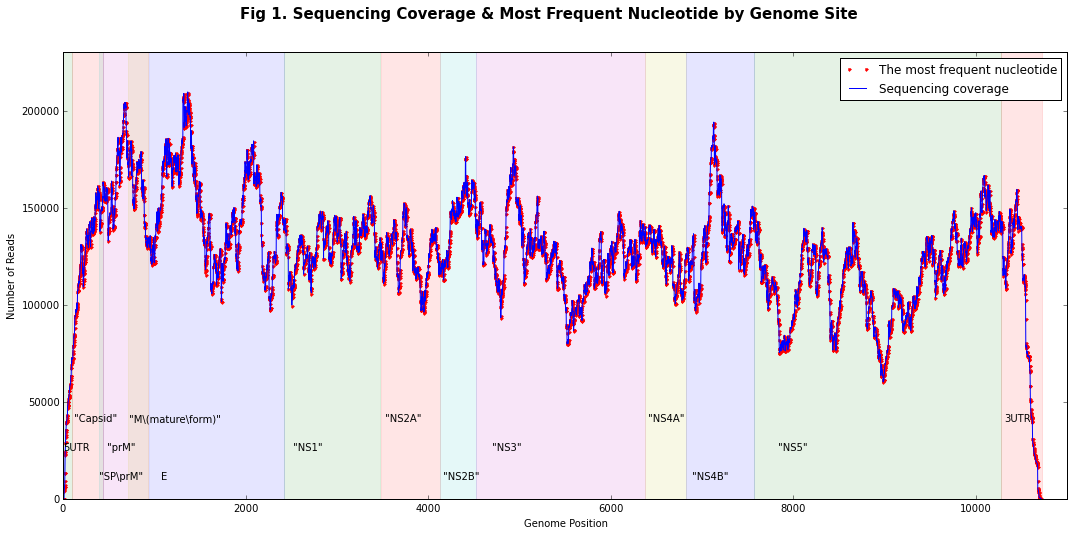

In [5]:

%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
plt.suptitle('Fig 1. Sequencing Coverage & Most Frequent Nucleotide by Genome Site', fontsize=15, fontweight='bold')
plt.plot (counts_dataframe ['position'], counts_dataframe ['majorbases'], 'r.') #(position, coverage, 'r-')
plt.plot (counts_dataframe ['position'], counts_dataframe ['coverage'], 'b-') #(position, coverage, 'r-')
plt.xlabel ('Genome Position')
plt.ylabel ('Number of Reads')
fig_size = rcParams["figure.figsize"]
#print ("Current figure size:", fig_size)
plt.legend (['The most frequent nucleotide', 'Sequencing coverage'], loc = 'upper right')
axis_lower_limit = 0
axis_upper_limit = 230000
plt.axis ([0, 11000, axis_lower_limit, axis_upper_limit])
color = 0.0
fcolor = list ('bgrcmybgrcmybgrcmybgrcmy')
color_counter = 0
#plt.axvspan(2000, 3000, ymin=0, ymax=1, alpha = 0.2)
#plt.axvspan(3500, 5000, ymin=0, ymax=1, facecolor = 'g', alpha = 0.5)
for gene in annots_list:
    color_counter +=1
    plt.axvspan(gene.start, gene.end, color = (fcolor [color_counter]), alpha = 0.1) #, label='NS5B')
    plt.text (gene.start + ((gene.end - gene.start)/10), 10000 + (15000 *(color_counter%3)) , gene.name, rotation=0)
    #print (color_counter%3)
    color += 1/len(annots_list)

__Figure 1 above shows__ the number of sequenced reads by genome position (we also call this sequencing coverage, or just coverage, blue line) and the number of reads that feature the most common nucleotide for this position. The colour bands indicate the spans of the various genes of the DENV coding sequence and the UTRs.


.

.

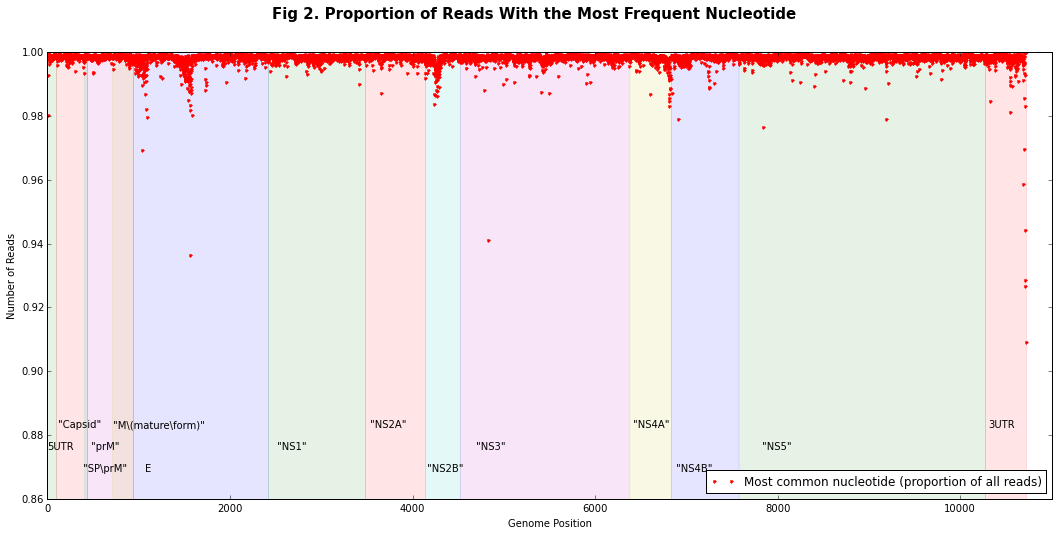

In [6]:
#majorbase_ratio = list ()
#coverage = counts_dataframe ['As'] + counts_dataframe ['Cs'] + counts_dataframe ['Gs'] + counts_dataframe ['Ts'] + counts_dataframe ['Ns']
#majorbases = counts_dataframe ['majorbases']
#for x in range (len(coverage)):
#    majorbase_ratio.append (majorbases [x]/coverage[x])
    
#def ratio(x,y):
#    return x/y

#majorbase_ratio = list(map(ratio, majorbases, coverage))

coverage = counts_dataframe ['coverage']
majorbase_ratio = counts_dataframe ['majorbase_ratio']

%matplotlib inline
rcParams['figure.figsize'] = 18, 8
plt.plot (counts_dataframe ['position'], majorbase_ratio, 'r.') #(position, coverage, 'r-')
plt.xlabel ('Genome Position')
plt.ylabel ('Number of Reads')
fig_size = rcParams["figure.figsize"]
plt.suptitle('Fig 2. Proportion of Reads With the Most Frequent Nucleotide', fontsize=15, fontweight='bold')
plt.legend (['Most common nucleotide (proportion of all reads)', 'coverage'], loc = 'lower right')
axis_lower_limit = 0.86
plt.axis ([0, 11000, axis_lower_limit, 1])
color = 0.0
fcolor = list ('bgrcmybgrcmybgrcmybgrcmy')
color_counter = 0
for gene in annots_list:
    color_counter +=1
    plt.axvspan(gene.start, gene.end, color = (fcolor [color_counter]), alpha = 0.1) #, label='NS5B')
    plt.text (gene.start + ((gene.end - gene.start)/10), axis_lower_limit + (axis_lower_limit/100) + (((1 - axis_lower_limit) /20) *(color_counter%3)) , gene.name, rotation=0)
    color += 1/len(annots_list)

__Figure 2 above shows__  the proportion reads that feature the most common nucleotide at this position. The proportion of reads with the most common nucleotide is a measure of the degree of polymorphism at the respective site. The absolute number of reads that contain the prevailing nucleotide shown in figure 1, crucially depend on the sequencing coverage, which is highly variable site-to-site and is therefore not useful for comparison of polymorphism across different sites of the dengue virus genome. The proportion of reads with the majority nucleotide on the other hand allows comparisons across sites of the genome and more generally. Sites with low value of this proportion feature a larger share of 'other', less common nucleotides and are arguably less conserved than sites with high values - those that vary very little.

As in figure 1, colour bands indicate the different genes in the DENV open reading frame. Note that to emphasize the existing patterns, only part of the y-axis is shown in the figure. This means that even when the frequency of the most common nucleotide is at its lowest extreme, it is still above 0.86, i.e. the lower bound of the y-axis.

.

.

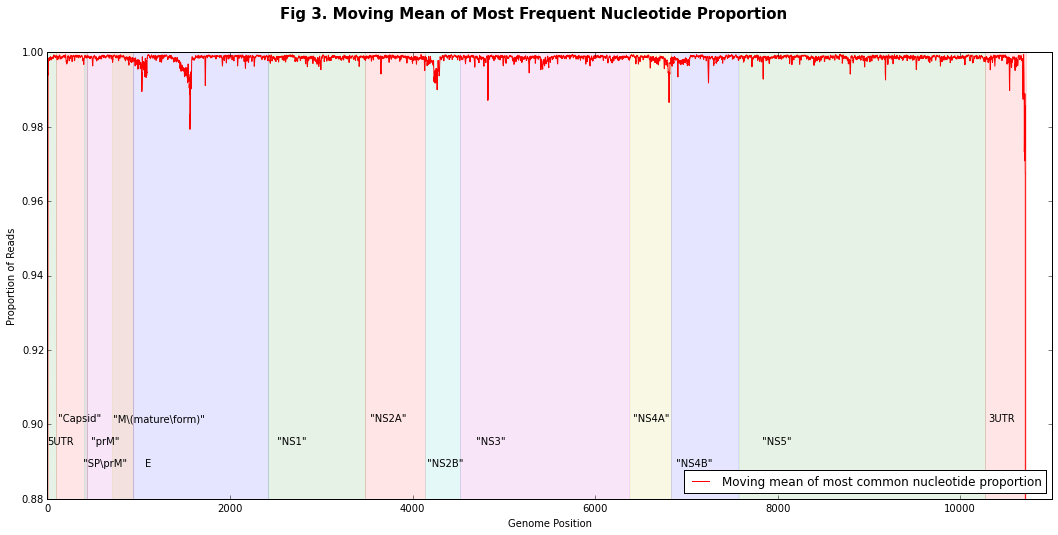

In [7]:
moving_average = (runningMeanFast (counts_dataframe ['majorbase_ratio'], 5))
%matplotlib inline
rcParams['figure.figsize'] = 18, 8
plt.suptitle('Fig 3. Moving Mean of Most Frequent Nucleotide Proportion', fontsize=15, fontweight='bold')
plt.plot (counts_dataframe ['position'], moving_average, 'r-') #(position, coverage, 'r-')
plt.xlabel ('Genome Position')
plt.ylabel ('Proportion of Reads')
axis_lower_limit = 0.88
plt.axis ([0, 11000, axis_lower_limit, 1])
color = 0.0
fcolor = list ('bgrcmybgrcmybgrcmybgrcmy')
color_counter = 0
#plt.axvspan(2000, 3000, ymin=0, ymax=1, alpha = 0.2)
#plt.axvspan(3500, 5000, ymin=0, ymax=1, facecolor = 'g', alpha = 0.5)
for gene in annots_list:
    color_counter +=1
    plt.axvspan(gene.start, gene.end, color = (fcolor [color_counter]), alpha = 0.1) #, label='NS5B')
    plt.text (gene.start + ((gene.end - gene.start)/10), axis_lower_limit + (axis_lower_limit/100) + (((1 - axis_lower_limit) /20) *(color_counter%3)) , gene.name, rotation=0)
    color += 1/len(annots_list)
#for gene in annots_list:
#    plt.hlines((color/10)+ 0.8, gene.start, gene.end, colors= (0+color, 1-color, 0.8, 1), linestyles='solid') #, label='NS5B')
#    plt.text( (gene.start + gene.end)/2, (color/10)+ 0.8, gene.name, rotation=0)
#    color += 1/len(annots_list)
fig_size = rcParams["figure.figsize"]
#print ("Current figure size:", fig_size)
plt.legend (['Moving mean of most common nucleotide proportion'], loc = 'lower right')
None

The graph in __Figure 3 above shows__ in essence the same information as Figure 2. The difference is that figure 3 uses the so-called moving average to smoothe the fluctuations a little, remove the far extremes and make the pattern easier to see. The genes and axes notations are the same as in figure 2.

The figure highlights specific regions with relatively higher polymorphism (the dips), particularly those in the beginning and middle of the envelope gene and one in the beginning of NS4B, and one in the (!!!) 3'UTR. Conversely it also highlights the most conserved parts of the genome, the peaks where sites feature the same nucleotide in ~99% of the reads.

.

.

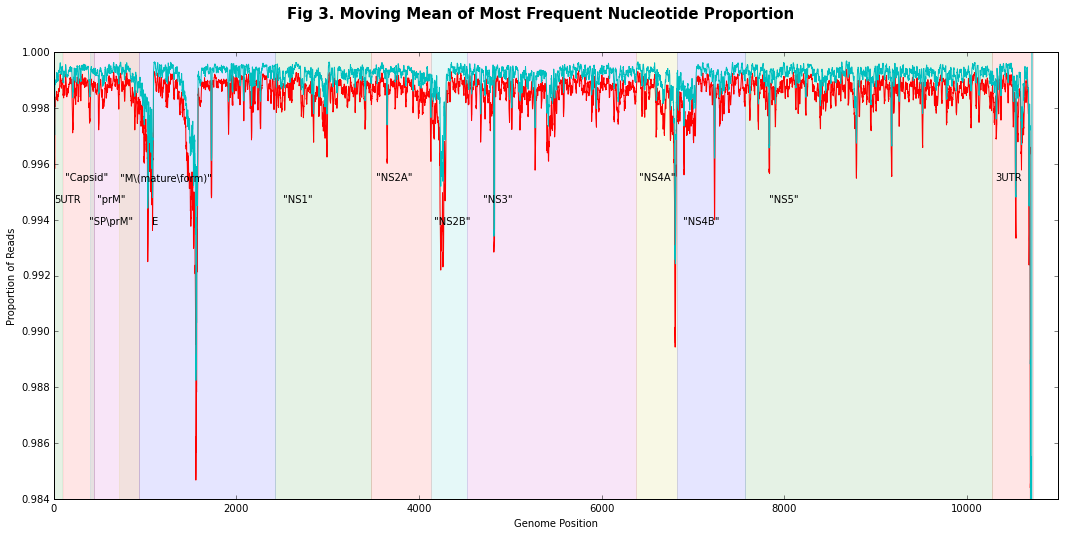

In [8]:
moving_average10 = (runningMeanFast (counts_dataframe ['majorbase_ratio'], 10))
moving_average10_secondba = (runningMeanFast (counts_dataframe ['secondbase_ratio'], 10))
%matplotlib inline
rcParams['figure.figsize'] = 18, 8
plt.suptitle('Fig 3. Moving Mean of Most Frequent Nucleotide Proportion', fontsize=15, fontweight='bold')
plt.plot (counts_dataframe ['position'], moving_average10, 'r-') #(position, coverage, 'r-')
plt.plot (counts_dataframe ['position'], 1 - moving_average10_secondba, 'c-') #(position, coverage, 'r-')
plt.xlabel ('Genome Position')
plt.ylabel ('Proportion of Reads')
axis_lower_limit = 0.984
plt.axis ([0, 11000, axis_lower_limit, 1])
color = 0.0
fcolor = list ('bgrcmybgrcmybgrcmybgrcmy')
color_counter = 0
#plt.axvspan(2000, 3000, ymin=0, ymax=1, alpha = 0.2)
#plt.axvspan(3500, 5000, ymin=0, ymax=1, facecolor = 'g', alpha = 0.5)
for gene in annots_list:
    color_counter +=1
    plt.axvspan(gene.start, gene.end, color = (fcolor [color_counter]), alpha = 0.1) #, label='NS5B')
    plt.text (gene.start + ((gene.end - gene.start)/10), axis_lower_limit + (axis_lower_limit/100) + (((1 - axis_lower_limit) /20) *(color_counter%3)) , gene.name, rotation=0)
    color += 1/len(annots_list)
#for gene in annots_list:
#    plt.hlines((color/10)+ 0.8, gene.start, gene.end, colors= (0+color, 1-color, 0.8, 1), linestyles='solid') #, label='NS5B')
#    plt.text( (gene.start + gene.end)/2, (color/10)+ 0.8, gene.name, rotation=0)
#    color += 1/len(annots_list)
fig_size = rcParams["figure.figsize"]
#print ("Current figure size:", fig_size)
#plt.legend (['Moving mean of most common nucleotide proportion'], loc = 'lower right')
None

AttributeError: 'AxesSubplot' object has no attribute 'ylabel'

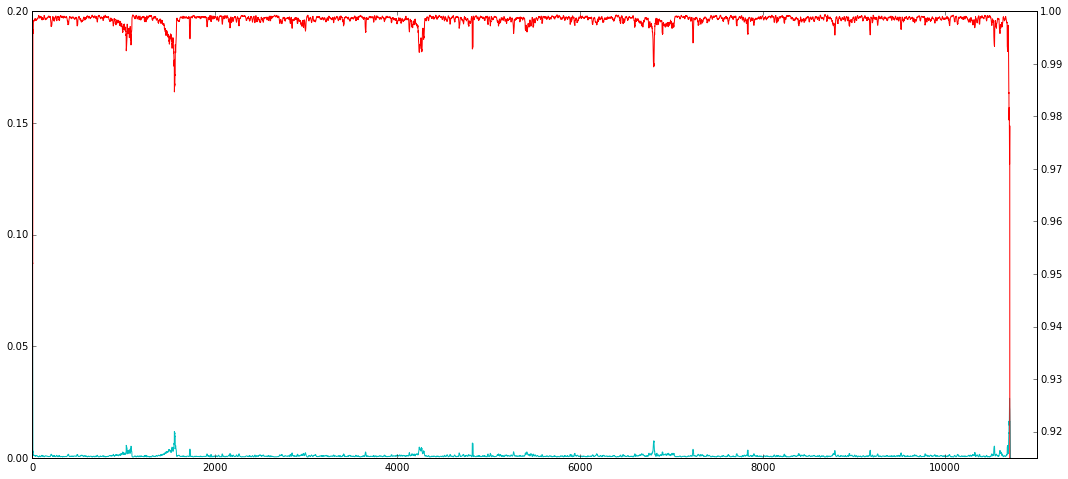

In [9]:
rcParams['figure.figsize'] = 18, 8
#plt.suptitle('Fig 1. Sequencing Coverage & Most Frequent Nucleotide by Genome Site', fontsize=15, fontweight='bold')
#plt.plot (counts_dataframe ['position'], counts_dataframe ['majorbases'], 'r.') #(position, coverage, 'r-')

#fig_w, fig_h = 33000, 500 # pixels
#dpi=100
#plt.figure(figsize=(float(fig_w)/float(dpi), float(fig_h)/float(dpi)), dpi=dpi, frameon=False)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot (counts_dataframe ['position'], moving_average10_secondba, 'c-') #(position, coverage, 'r-')
#ax1.xlabel ('Genome Position')
#ax1.ylabel ('Number of Reads')
#fig_size = rcParams["figure.figsize"]
#print ("Current figure size:", fig_size)
#ax1.legend (['Sequencing coverage'], loc = 'lower left')
axis_lower_limit = 0
axis_upper_limit = 0.2
ax1.axis ([0, 11000, axis_lower_limit, axis_upper_limit])
color = 0.0
fcolor = list ('bgrcmybgrcmybgrcmybgrcmy')
color_counter = 0


ax2.plot (counts_dataframe ['position'], moving_average10, 'r-') #(position, coverage, 'r-')

axis_lower_limit = 0.915
ax2.axis ([0, 11000, axis_lower_limit, 1])
ax2.ylabel ('Proportion of Reads')
ax2.legend (['The most frequent nucleotide'], loc = 'upper right')

#plt.axvspan(2000, 3000, ymin=0, ymax=1, alpha = 0.2)
#plt.axvspan(3500, 5000, ymin=0, ymax=1, facecolor = 'g', alpha = 0.5)
for gene in annots_list:
    color_counter +=1
    plt.axvspan(gene.start, gene.end, color = (fcolor [color_counter]), alpha = 0.1) #, label='NS5B')
    plt.text (gene.start + ((gene.end - gene.start)/10), 10000 + (15000 *(color_counter%3)) , gene.name, rotation=0)
    #print (color_counter%3)
    color += 1/len(annots_list)

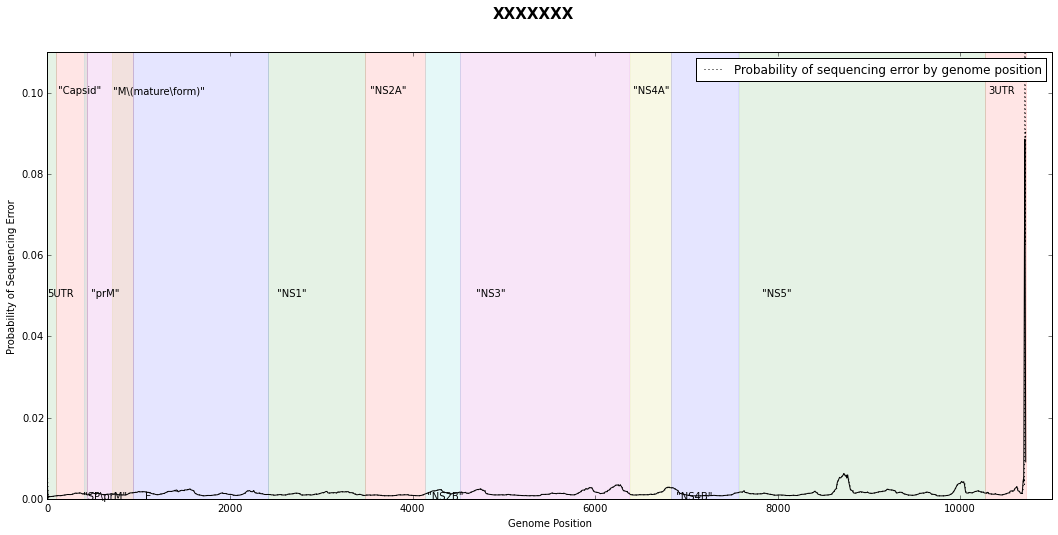

In [10]:
%matplotlib inline
rcParams['figure.figsize'] = 18, 8
moving_average10_proberror = (runningMeanFast (counts_dataframe ['probability_of_seq_error'], 10))
plt.suptitle('XXXXXXX', fontsize=15, fontweight='bold')
plt.plot (counts_dataframe ['position'], counts_dataframe ['probability_of_seq_error'], 'k:')
plt.plot (counts_dataframe ['position'], moving_average10_proberror, 'k-')
plt.xlabel ('Genome Position')
plt.ylabel ('Probability of Sequencing Error')
axis_lower_limit = 0#.88
plt.axis ([0, 11000, axis_lower_limit, 0.11])
color = 0.0
fcolor = list ('bgrcmybgrcmybgrcmybgrcmy')
color_counter = 0
#plt.axvspan(2000, 3000, ymin=0, ymax=1, alpha = 0.2)
#plt.axvspan(3500, 5000, ymin=0, ymax=1, facecolor = 'g', alpha = 0.5)
for gene in annots_list:
    color_counter +=1
    plt.axvspan(gene.start, gene.end, color = (fcolor [color_counter]), alpha = 0.1) #, label='NS5B')
    plt.text (gene.start + ((gene.end - gene.start)/10), axis_lower_limit + (axis_lower_limit/100) + (((1 - axis_lower_limit) /20) *(color_counter%3)) , gene.name, rotation=0)
    color += 1/len(annots_list)
#for gene in annots_list:
#    plt.hlines((color/10)+ 0.8, gene.start, gene.end, colors= (0+color, 1-color, 0.8, 1), linestyles='solid') #, label='NS5B')
#    plt.text( (gene.start + gene.end)/2, (color/10)+ 0.8, gene.name, rotation=0)
#    color += 1/len(annots_list)
fig_size = rcParams["figure.figsize"]
#print ("Current figure size:", fig_size)
plt.legend (['Probability of sequencing error by genome position'], loc = 'upper right')
None

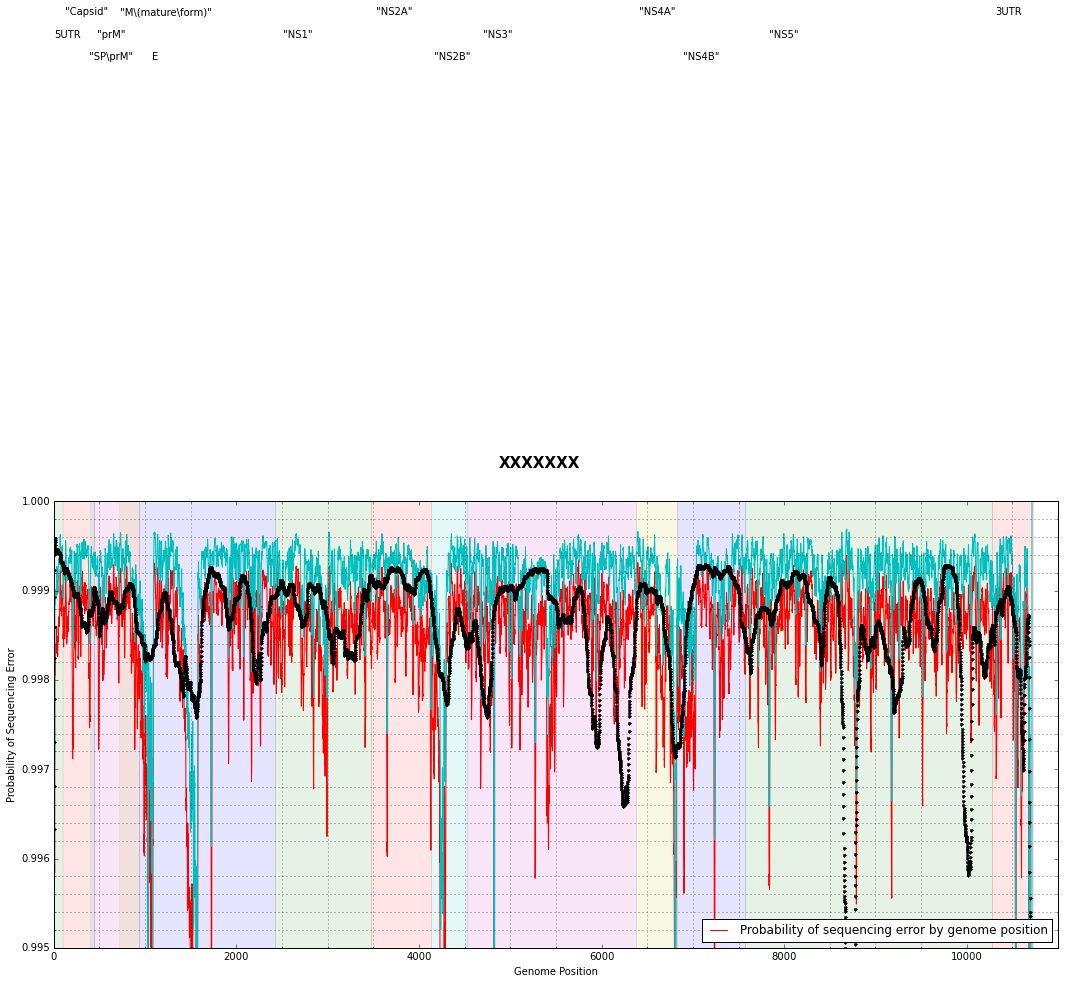

In [11]:
%matplotlib inline
rcParams['figure.figsize'] = 18, 8
moving_average10_proberror = (runningMeanFast (counts_dataframe ['probability_of_seq_error'], 10))
plt.suptitle('XXXXXXX', fontsize=15, fontweight='bold')
plt.plot (counts_dataframe ['position'], moving_average10, 'r-') #(position, coverage, 'r-')
plt.plot (counts_dataframe ['position'], 1 - moving_average10_secondba, 'c-') #(position, coverage, 'r-')
plt.grid (True, which = 'minor')
plt.minorticks_on()
#plt.plot (counts_dataframe ['position'], counts_dataframe ['probability_of_seq_error'], 'k:')
plt.plot (counts_dataframe ['position'], 1-moving_average10_proberror, 'k.')
plt.xlabel ('Genome Position')
plt.ylabel ('Probability of Sequencing Error')
axis_lower_limit = 0.995
plt.axis ([0, 11000, axis_lower_limit, 1])
color = 0.0
fcolor = list ('bgrcmybgrcmybgrcmybgrcmy')
color_counter = 0
#plt.axvspan(2000, 3000, ymin=0, ymax=1, alpha = 0.2)
#plt.axvspan(3500, 5000, ymin=0, ymax=1, facecolor = 'g', alpha = 0.5)
for gene in annots_list:
    color_counter +=1
    plt.axvspan(gene.start, gene.end, color = (fcolor [color_counter]), alpha = 0.1) #, label='NS5B')
    plt.text (gene.start + ((gene.end - gene.start)/10), axis_lower_limit + (axis_lower_limit/100) + (((1 - axis_lower_limit) /20) *(color_counter%3)) , gene.name, rotation=0)
    color += 1/len(annots_list)
#for gene in annots_list:
#    plt.hlines((color/10)+ 0.8, gene.start, gene.end, colors= (0+color, 1-color, 0.8, 1), linestyles='solid') #, label='NS5B')
#    plt.text( (gene.start + gene.end)/2, (color/10)+ 0.8, gene.name, rotation=0)
#    color += 1/len(annots_list)
fig_size = rcParams["figure.figsize"]
#print ("Current figure size:", fig_size)
plt.legend (['Probability of sequencing error by genome position'], loc = 'lower right')
None

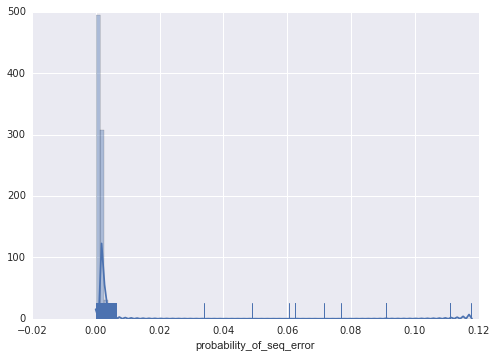

In [12]:
import seaborn as sns
sns.distplot (counts_dataframe ['probability_of_seq_error'], rug = True, bins = 100)
#plt.xscale('log')

AttributeError: 'AxesSubplot' object has no attribute 'ylabel'

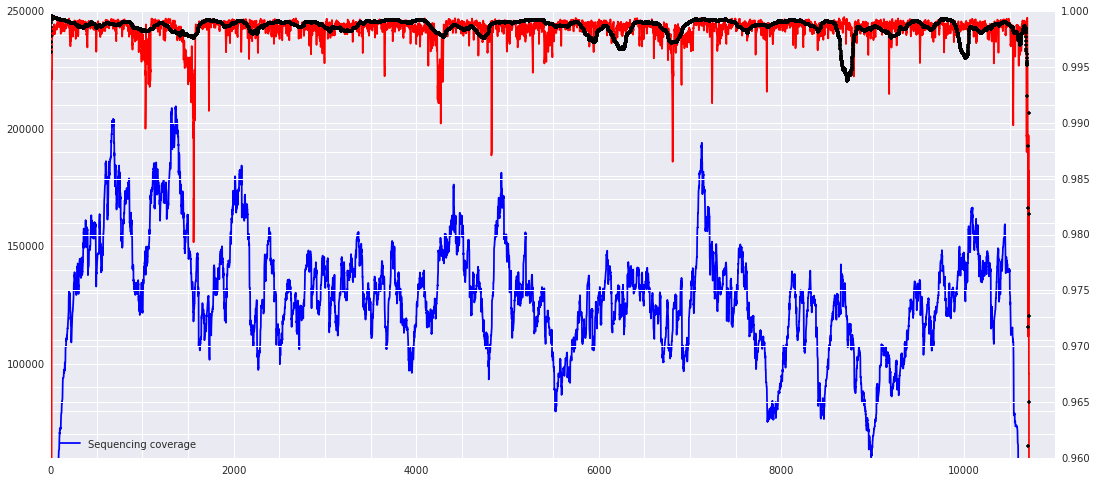

In [13]:
rcParams['figure.figsize'] = 18, 8
#plt.suptitle('Fig 1. Sequencing Coverage & Most Frequent Nucleotide by Genome Site', fontsize=15, fontweight='bold')
#plt.plot (counts_dataframe ['position'], counts_dataframe ['majorbases'], 'r.') #(position, coverage, 'r-')

#fig_w, fig_h = 33000, 500 # pixels
#dpi=100
#plt.figure(figsize=(float(fig_w)/float(dpi), float(fig_h)/float(dpi)), dpi=dpi, frameon=False)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot (counts_dataframe ['position'], counts_dataframe ['coverage'], 'b-') #(position, coverage, 'r-')
#ax1.xlabel ('Genome Position')
#ax1.ylabel ('Number of Reads')
#fig_size = rcParams["figure.figsize"]
#print ("Current figure size:", fig_size)
ax1.grid (True, which = 'minor')
ax1.minorticks_on()
ax1.legend (['Sequencing coverage'], loc = 'lower left')
axis_lower_limit = 60000
axis_upper_limit = 250000
ax1.axis ([0, 11000, axis_lower_limit, axis_upper_limit])
color = 0.0
fcolor = list ('bgrcmybgrcmybgrcmybgrcmy')
color_counter = 0


ax2.plot (counts_dataframe ['position'], moving_average, 'r-') #(position, coverage, 'r-')
ax2.plot (counts_dataframe ['position'], 1-moving_average10_proberror, 'k.')
axis_lower_limit = 0.96
ax2.axis ([0, 11000, axis_lower_limit, 1])
ax2.ylabel ('Proportion of Reads')
ax2.legend (['The most frequent nucleotide'], loc = 'upper right')
#plt.axvspan(2000, 3000, ymin=0, ymax=1, alpha = 0.2)
#plt.axvspan(3500, 5000, ymin=0, ymax=1, facecolor = 'g', alpha = 0.5)
for gene in annots_list:
    color_counter +=1
    plt.axvspan(gene.start, gene.end, color = (fcolor [color_counter]), alpha = 0.1) #, label='NS5B')
    plt.text (gene.start + ((gene.end - gene.start)/10), 10000 + (15000 *(color_counter%3)) , gene.name, rotation=0)
    #print (color_counter%3)
    color += 1/len(annots_list)

In [14]:
import scipy.stats
import statistics




In [15]:

list1, list2, list3 = determin_codon_posit(annots_list[1], counts_dataframe ['majorsequence'])

print (list1)

['t', 'a', 'a', 'a', 'g', 'a', 'a', 'c', 'g', 'a', 'c', 'c', 't', 'a', 't', 't', 'a', 'g', 'a', 'g', 'a', 'g', 't', 'c', 'c', 't', 'a', 'a', 't', 'c', 'a', 'g', 't', 'c', 't', 'g', 't', 't', 'a', 'g', 'g', 'g', 'c', 't', 'a', 't', 't', 't', 'c', 't', 't', 'c', 't', 't', 'g', 't', 't', 'c', 't', 'c', 'c', 'c', 'c', 'g', 't', 't', 'a', 'g', 'g', 'g', 'c', 't', 'a', 'a', 'c', 'a', 'c', 't', 'a', 't', 't', 'g', 'g', 't', 'g', 'a', 'a', 't', 'g', 'g', 't', 't', 'a', 't', 't', 'a', 'g', 'g', 'g', 'g', 'c', 'c', 'g', 't', 't', 't', 't', 't', 't', 'c', 'c', 't', 't', 'c']


"Capsid": 97 to 438
0.124009429191 0.100410567287
WilcoxonResult(statistic=2547.0, pvalue=0.053672202306696018)
WilcoxonResult(statistic=2668.0, pvalue=0.1134610028651985)
"SP\prM": 397 to 438
0.289013180105 0.582845740257
WilcoxonResult(statistic=31.0, pvalue=0.31089682851661204)
WilcoxonResult(statistic=19.0, pvalue=0.064030148433023223)
"prM": 439 to 936
0.0301707636008 -0.0242757001104
WilcoxonResult(statistic=6563.0, pvalue=0.64344315467042623)
WilcoxonResult(statistic=6429.0, pvalue=0.49592709302446103)
"M\(mature\form)": 712 to 936
0.00870892375437 -0.0175324347265
WilcoxonResult(statistic=1282.0, pvalue=0.56979503283147959)
WilcoxonResult(statistic=1377.0, pvalue=0.95489093738984798)
E: 937 to 2421
-0.00387186747375 -0.100845374191
WilcoxonResult(statistic=60202.0, pvalue=0.76942407099005272)
WilcoxonResult(statistic=56027.0, pvalue=0.10775926049958055)
"NS1": 2422 to 3477
-0.0170031626926 -0.060536089575
WilcoxonResult(statistic=29943.0, pvalue=0.61936777759022454)
WilcoxonRes

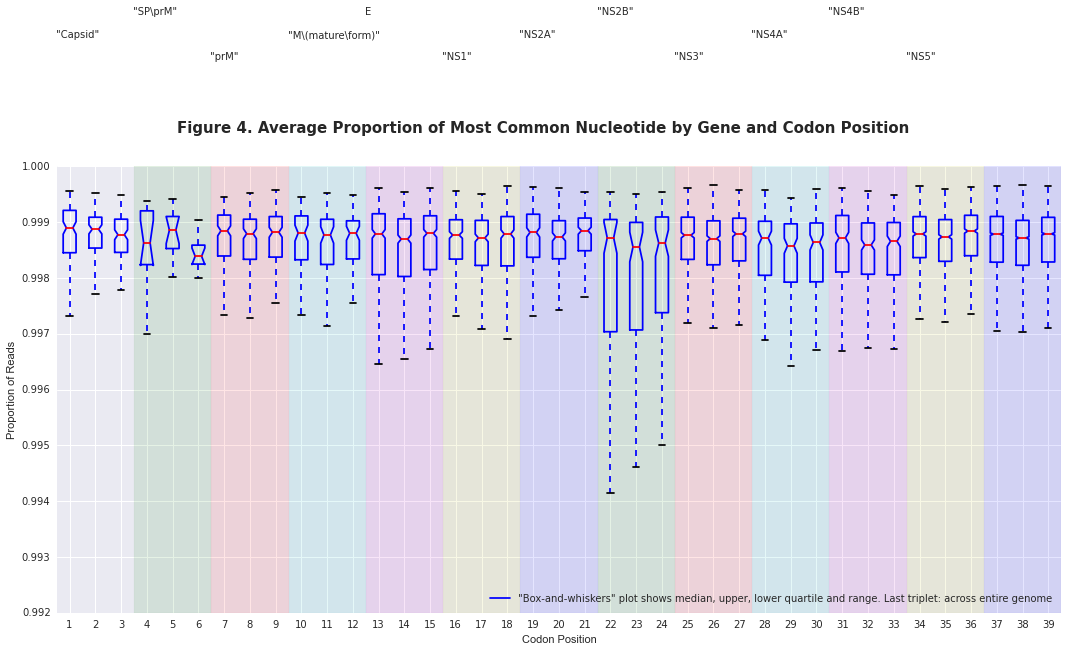

In [16]:
geneslist = list() 
#print (len(majorbase_ratio))
#list1, list2, list3 = determin_codon_posit(x, majorbase_ratio)
global_list1 = list()
global_list2 = list()
global_list3 = list()
for x in annots_list:
    if x.start>0 and x.end< len(majorbase_ratio) and 'UTR' not in x.name:
        list1, list2, list3 = determin_codon_posit(x, majorbase_ratio) # provides three lists of majorbase_ratio values for positions 1, 2 and 3 over the length of segment x
        geneslist.append (list1) # these three commands create list of lists... 
        geneslist.append (list2) # ...created by appending list of values for codon position1, then 2, then 3 for each gene in turn...
        geneslist.append (list3) # ...as the loop goes through members of annots_list
        list1_pruned = list1[0:-1] 
        list2_pruned = list2[0:-1]
        global_list1.extend(list1_pruned) # these three create a list of values for...
        global_list2.extend(list2_pruned) # ... codon positions 1, 2 and 3 throughout...
        global_list3.extend(list3)        # ... the entire genome.
        print (x)
        print ((statistics.median(list1_pruned) - statistics.median (list3))*1000, (statistics.median (list2_pruned) - statistics.median (list3))*1000)
        print (scipy.stats.wilcoxon (list1_pruned, list3)) # Wilcoxon signed rank test on position 1 vs. position 3...
        print (scipy.stats.wilcoxon (list2_pruned, list3)) # ...and pos2 vs. pos3 gene by gene

%matplotlib inline
rcParams['figure.figsize'] = 18, 8
plt.xlabel ('Codon Position')
plt.ylabel ('Proportion of Reads')
#plt.axis ([0, 11000, 0.8, 1])
print ("Across the genome")
print ((statistics.median(global_list1) - statistics.median (global_list3))*1000, (statistics.median (global_list2) - statistics.median (global_list3))*1000)
print (scipy.stats.wilcoxon (global_list1, global_list3)) # Wilcoxon signed rank test on position 1 vs. position 3...
print (scipy.stats.wilcoxon (global_list2, global_list3)) # ...and pos2 vs. pos3 over entire genome
print ('')
print ('')
geneslist.append (global_list1) # adds the list of all-genome lists in positions 1, 2 and 3 to...
geneslist.append (global_list2) # ...the list of lists 'genelist', used to do the...
geneslist.append (global_list3) # ... boxplot below
plt.suptitle('Figure 4. Average Proportion of Most Common Nucleotide by Gene and Codon Position', fontsize=15, fontweight='bold')
axis_lower_limit = 0.992
plt.axis ([0, 39, axis_lower_limit, 1])
plt.boxplot(geneslist, 1)
plt.legend (['"Box-and-whiskers" plot shows median, upper, lower quartile and range. Last triplet: across entire genome'], loc = 'lower right')
color = 0.0
fcolor = list ('bgrcmybgrcmybgrcmybgrcmy')
color_counter = 0
#plt.axvspan(2000, 3000, ymin=0, ymax=1, alpha = 0.2)
#plt.axvspan(3500, 5000, ymin=0, ymax=1, facecolor = 'g', alpha = 0.5)
for gene in annots_list:
    if 'UTR' not in gene.name:
        #print (annots_list.index(gene))
        color_counter +=1
        plt.axvspan((annots_list.index(gene))*3 + 0.5, (annots_list.index(gene) + 1)*3 + 0.5, color = (fcolor [color_counter]), alpha = 0.1) #, label='NS5B')
        plt.text ((annots_list.index(gene) - 1)*3 + 0.5, axis_lower_limit + (axis_lower_limit/100) + (((1 - axis_lower_limit) /20) *(color_counter%3)) , gene.name, rotation=0)
        color += 1/len(annots_list)
None # this removes lots of unwanted output that matplotlib throws out.